# | Import libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# | Loading data file

In [2]:
df=pd.read_csv("C:\\Users\\Mazen.mo\\OneDrive - Arab Open University - AOU\\Desktop\\Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# | Check the missing data & info about data file

In [3]:
print("Are there missing values?",df.isnull().any())

Are there missing values? PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
print("Are there missing values?",df.isnull().sum())

Are there missing values? PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [12]:
print("Are there duplicated values?",df.duplicated().any())

Are there duplicated values? False


# | Data statistics describe

In [15]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

-A comparison revealed that more than 60% of the passengers had died.



In [21]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

-Approximately 65% of the tourists were male while the remaining 35% were female.



In [22]:
df['SibSp'].value_counts()


SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

-SibSp is the number of siblings or spouse of a person onboard. A maximum of 8 siblings and spouses traveled along with one of the traveler. More than 90% of people traveled alone or with one of their sibling or spouse.

In [23]:
df['Fare_Category'] = pd.cut(df['Fare'], bins=[0,7.90,14.45,31.28,120], labels=['Low','Mid','High_Mid','High'])
df['Fare_Category'].value_counts()  

Fare_Category
High_Mid    236
Mid         217
Low         208
High        177
Name: count, dtype: int64

In [25]:
pd.crosstab(df['Fare_Category'],df['Survived'])

Survived,0,1
Fare_Category,,
Low,165,43
Mid,150,67
High_Mid,134,102
High,76,101


-We conclude from this statistic that the chance of survival was higher for those who paid a high fare.

# | Data visualization

-visualize pclass that survived and not survived.

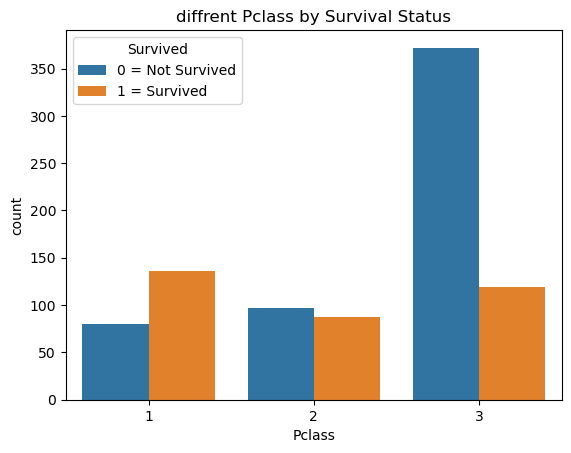

In [65]:
sns.countplot(x='Pclass',data=df,hue='Survived')
legend_labels = {0: 'Not Survived', 1: 'Survived'}
plt.legend(title='Survived', labels=[f"{key} = {value}" for key, value in legend_labels.items()])
plt.title('diffrent Pclass by Survival Status')
plt.show()

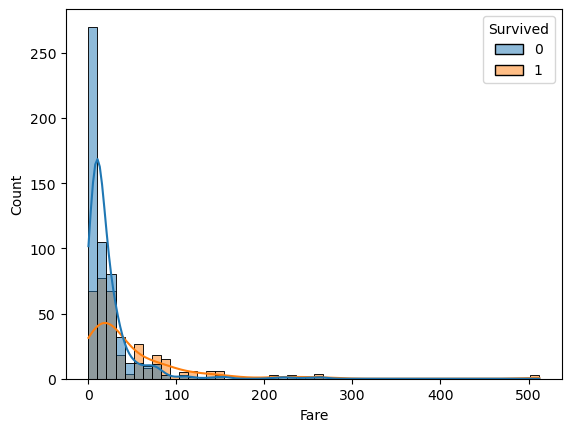

In [64]:
sns.histplot(x='Fare',hue='Survived',data=df,kde=True,bins=50)
plt.show()

-visualize ages that survived and not survived.

C:\Users\Mazen.mo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


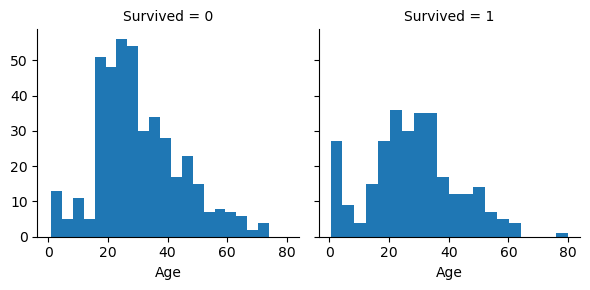

In [43]:
age=sns.FacetGrid(df,col='Survived')
age.map(plt.hist,'Age',bins=20)

-visualize gender that survived and not survived.

C:\Users\Mazen.mo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


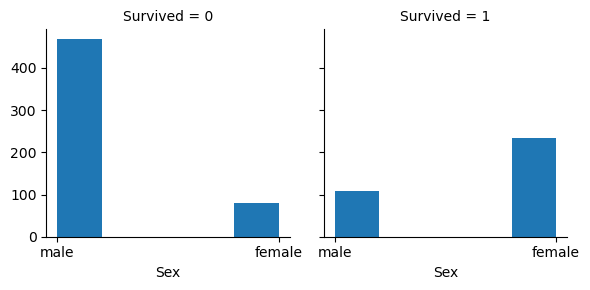

In [66]:
gender=sns.FacetGrid(df,col='Survived')
gender.map(plt.hist,'Sex',bins=5)

-The count plot reveals variations in survival outcomes among passengers who boarded at different ports. Notably, passengers who embarked at (C) appear to have a higher survival rate compared to those who embarked at Southampton (S) or (Q).

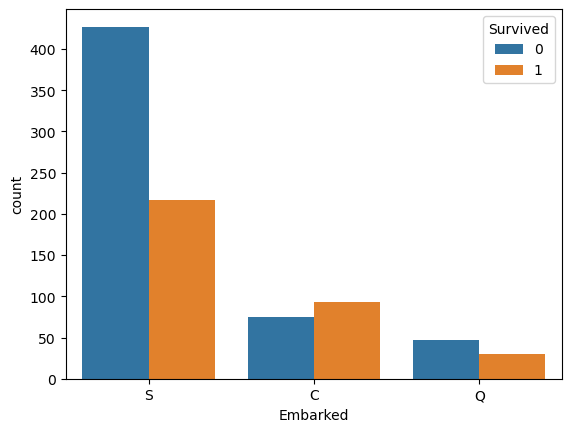

In [69]:
#Survival by Embarked Location:
sns.countplot(x='Embarked',hue='Survived',data=df)
plt.show()